<a href="https://colab.research.google.com/github/claytonelbelTAMU/IPEC-638-Introduction-to-Data-Science/blob/main/project/ICPE_DS2_Spring_2025_Clayton_Elbel_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with Keras
###  ICPE 638 - Spring 2025

[Haoyu Niu](https://orcid.org/0000-0002-7052-8877), Texas A&M University.
Updated: Jan. 29, 2025.

**(40 points)**

### **Dataset**
The goal of this assignment is to build a deep neural network model to classify images in the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images classified over 10 classes, with 6,000 images per class. There are 5,0000 training images and 10,000 test images.

The 10 classes are:
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

### **Problem**

1. Create two deep neural network models:
   1. One with one dense layer with 512 neurons per layer
   2. One with two dense layers with 256 neurons in each layer.

2. Compile both models by setting the optimizer to **adam** (adaptive moment estimation) and the loss function to **"sparse_categorical_crossentropy"**.

3. Train both models for **20 epochs** and output the **validation error** for both models.

4. Compare the validation error of your models against that of the convolution neural network (CNN) model provided below and explain why the CNN model performs better.

5. **(Extra Credit)**: Modify the CNN model to improve the validation error and discuss your results.

## Load and process the dataset for training
**Please don't change this section!**

You can use `(X_train, y_train) and (X_test, y_test)` for training and testing in your code respectively.

In [1]:
%load_ext tensorboard
from tensorflow.keras import utils, callbacks, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import os, datetime

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


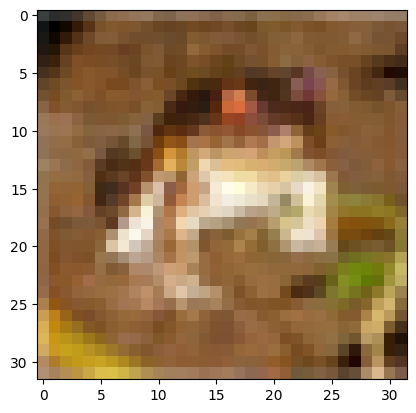

In [3]:
# show the first image in the data set
plt.imshow(X_train[0])

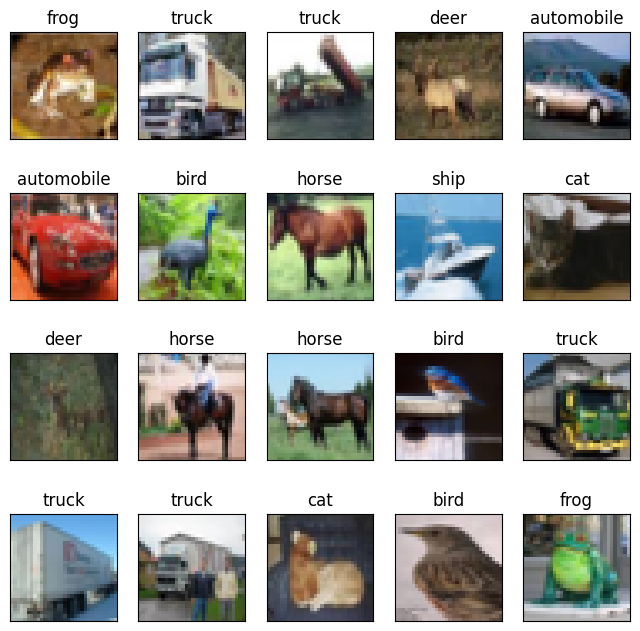

In [4]:
# show the first 15 images in the data set.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
fig = plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    #plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title(class_names[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])

In [5]:
# Normalize the train dataset
X_train = utils.normalize(X_train, axis=1)
# Normalize the test dataset
X_test = utils.normalize(X_test, axis=1)

## Build, compile, and train the model object
You can start creating, compiling, and training your models here.

### Model with one dense layer with 512 neurons

In [6]:
# Create the model
model1 = Sequential()
# Flatten the 32x32x3 input images to a 3072 feature vector
model1.add(Flatten(input_shape=(32, 32, 3)))
# Add one dense layer with 512 neurons and ReLU activation
model1.add(Dense(512, activation='relu'))
# Output layer with 10 neurons (one for each class) and softmax activation
model1.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Print the model summary
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model with adam optimizer and sparse_categorical_crossentropy loss
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model for 20 epochs
history1 = model1.fit(X_train, y_train,
                     epochs=20,
                     validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2290 - loss: 2.1228 - val_accuracy: 0.3211 - val_loss: 1.9141
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3193 - loss: 1.8988 - val_accuracy: 0.3235 - val_loss: 1.8904
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3566 - loss: 1.8144 - val_accuracy: 0.3583 - val_loss: 1.7893
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3759 - loss: 1.7631 - val_accuracy: 0.3814 - val_loss: 1.7668
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3942 - loss: 1.7142 - val_accuracy: 0.3751 - val_loss: 1.7600
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4002 - loss: 1.6956 - val_accuracy: 0.3881 - val_loss: 1.7108
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4155 - loss: 1.6618 - val_accuracy: 0.3767 - val_loss: 1.7507
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4169 - loss: 1.6572 - 

### Model with two dense layers with 256 neurons each

In [10]:
# Create the model
model2 = Sequential()
# Flatten the 32x32x3 input images to a 3072 feature vector
model2.add(Flatten(input_shape=(32, 32, 3)))
# Add first dense layer with 256 neurons and ReLU activation
model2.add(Dense(256, activation='relu'))
# Add second dense layer with 256 neurons and ReLU activation
model2.add(Dense(256, activation='relu'))
# Output layer with 10 neurons (one for each class) and softmax activation
model2.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Print the model summary
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 855,050 (3.26 MB)

 Trainable params: 855,050 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model with adam optimizer and sparse_categorical_crossentropy loss
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model for 20 epochs
history2 = model2.fit(X_train, y_train,
                     epochs=20,
                     validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2228 - loss: 2.1138 - val_accuracy: 0.3270 - val_loss: 1.8881
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3226 - loss: 1.8955 - val_accuracy: 0.3488 - val_loss: 1.8272
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3520 - loss: 1.8088 - val_accuracy: 0.3641 - val_loss: 1.7697
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3700 - loss: 1.7734 - val_accuracy: 0.3583 - val_loss: 1.7991
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3820 - loss: 1.7274 - val_accuracy: 0.3700 - val_loss: 1.7691
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3949 - loss: 1.6956 - val_accuracy: 0.3879 - val_loss: 1.7209
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4009 - loss: 1.6702 - val_accuracy: 0.3913 - val_loss: 1.7005
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4121 - loss: 1.6485 - 

### Evaluate Model Performance and Visualize Results

In [15]:
# Calculate validation error for both models
val_acc1 = history1.history['val_accuracy'][-1]
val_error1 = 1 - val_acc1
print(f"Model 1 (one dense layer with 512 neurons):")
print(f"  - Validation Accuracy: {val_acc1:.4f}")
print(f"  - Validation Error: {val_error1:.4f}")

Model 1 (one dense layer with 512 neurons):
  - Validation Accuracy: 0.4254
  - Validation Error: 0.5746


In [16]:
val_acc2 = history2.history['val_accuracy'][-1]
val_error2 = 1 - val_acc2
print(f"\nModel 2 (two dense layers with 256 neurons each):")
print(f"  - Validation Accuracy: {val_acc2:.4f}")
print(f"  - Validation Error: {val_error2:.4f}")


Model 2 (two dense layers with 256 neurons each):
  - Validation Accuracy: 0.4198
  - Validation Error: 0.5802


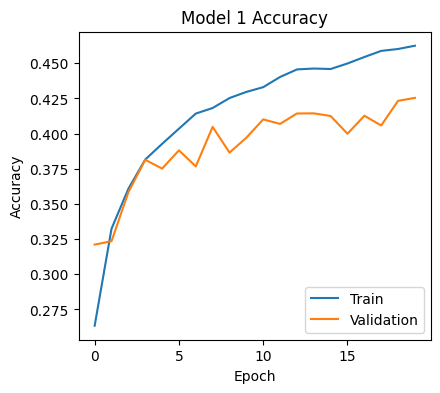

In [17]:
# Plot training and validation accuracy over epochs for Model 1
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

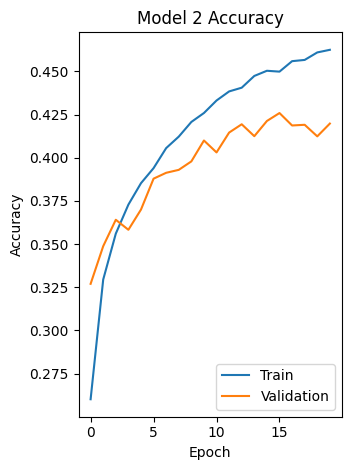

In [18]:
# Plot training and validation accuracy over epochs for Model 2
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.tight_layout()
plt.show()

In [19]:
# Calculate training accuracy
train_acc1 = history1.history['accuracy'][-1]
train_acc2 = history2.history['accuracy'][-1]

**Training Behavior**

- Both models show a similar pattern of improvement over the 20 epochs

- The validation accuracy curves for both models are somewhat unstable/noisy, showing fluctuations during training

- Both models show signs of plateauing toward the end of training, suggesting
that additional epochs might not significantly improve performance

In [20]:
# Calculate the gap between training and validation accuracy (to check for overfitting)
acc_gap1 = train_acc1 - val_acc1
acc_gap2 = train_acc2 - val_acc2

print("\nOverfitting Analysis:")
print(f"Model 1 - Training accuracy: {train_acc1:.4f}, Validation accuracy: {val_acc1:.4f}")
print(f"Model 1 - Accuracy gap (train-val): {acc_gap1:.4f} {'- Possible overfitting' if acc_gap1 > 0.1 else ''}")
print(f"Model 2 - Training accuracy: {train_acc2:.4f}, Validation accuracy: {val_acc2:.4f}")
print(f"Model 2 - Accuracy gap (train-val): {acc_gap2:.4f} {'- Possible overfitting' if acc_gap2 > 0.1 else ''}")


Overfitting Analysis:
Model 1 - Training accuracy: 0.4625, Validation accuracy: 0.4254
Model 1 - Accuracy gap (train-val): 0.0371 
Model 2 - Training accuracy: 0.4625, Validation accuracy: 0.4198
Model 2 - Accuracy gap (train-val): 0.0427 


**Overfitting Analysis**

- Model 1 has a training-validation accuracy gap of 3.71% (46.25% - 42.54%)
- Model 2 has a training-validation accuracy gap of 4.27% (46.25% - 41.98%)
- Neither model shows severe overfitting, as the gaps are relatively small (less than 5%)
- Model 2 has a slightly larger gap, suggesting it might be beginning to overfit more than Model 1

In [21]:
# Compare models directly
print("\nModel Comparison:")
if val_acc1 > val_acc2:
    print(f"Model 1 performs better by {(val_acc1 - val_acc2) * 100:.2f}% on validation data")
elif val_acc2 > val_acc1:
    print(f"Model 2 performs better by {(val_acc2 - val_acc1) * 100:.2f}% on validation data")
else:
    print("Both models perform equally on validation data")


Model Comparison:
Model 1 performs better by 0.56% on validation data


**Performance Comparison**

- Model 1 (one dense layer with 512 neurons) achieved a validation accuracy of 42.54% (validation error: 57.46%)
- Model 2 (two dense layers with 256 neurons each) achieved a validation accuracy of 41.98% (validation error: 58.02%)
- Model 1 performed slightly better by 0.56% on validation data, despite having a simpler architecture

In [23]:
# Number of parameters comparison
model1_params = model1.count_params()
model2_params = model2.count_params()
print(f"\nModel 1 has {model1_params:,} parameters")
print(f"Model 2 has {model2_params:,} parameters")
print(f"Difference: {abs(model1_params - model2_params):,} parameters")


Model 1 has 1,578,506 parameters
Model 2 has 855,050 parameters
Difference: 723,456 parameters


In [25]:
# Print the final validation accuracy and error for both models
val_acc1 = history1.history['val_accuracy'][-1]
val_error1 = 1 - val_acc1
print(f"Model 1 (one dense layer with 512 neurons):")
print(f"  - Validation Accuracy: {val_acc1:.4f}")
print(f"  - Validation Error: {val_error1:.4f}")

val_acc2 = history2.history['val_accuracy'][-1]
val_error2 = 1 - val_acc2
print(f"\nModel 2 (two dense layers with 256 neurons each):")
print(f"  - Validation Accuracy: {val_acc2:.4f}")
print(f"  - Validation Error: {val_error2:.4f}")

Model 1 (one dense layer with 512 neurons):
  - Validation Accuracy: 0.4254
  - Validation Error: 0.5746

Model 2 (two dense layers with 256 neurons each):
  - Validation Accuracy: 0.4198
  - Validation Error: 0.5802


### **1D Model vs 2D Model Analysis**

- The simpler Model 1 performed marginally better while using more parameters
- Both models achieved only modest accuracy (around 42-43%), which is much better than random guessing but still not great for practical image classification
- The relatively poor performance suggests that fully connected neural networks are not well-suited for image classification tasks

## Compare against Convolution Neural Network (CNN) Model
**Please don't change this section!**

You just need to run the following to create and train a convolution neural network and compare the validation error to those from your models and explain why CNN is better.

In [24]:
!rm -rf logs/model_cnn
#Build the model object
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

# Compile the model
model_cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# This is needed for loading Tensorboard.
tensorboard_callback = callbacks.TensorBoard(log_dir="logs/model_cnn", histogram_freq=1)
model_cnn.fit(x=X_train, y=y_train, epochs=20,
      validation_data=(X_test, y_test),
      callbacks=[tensorboard_callback]) # Start training process

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.2790 - loss: 1.9526 - val_accuracy: 0.4646 - val_loss: 1.4901
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.4846 - loss: 1.4393 - val_accuracy: 0.5271 - val_loss: 1.3257
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5611 - loss: 1.2416 - val_accuracy: 0.5689 - val_loss: 1.2246
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6053 - loss: 1.1162 - val_accuracy: 0.6168 - val_loss: 1.0956
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6338 - loss: 1.0459 - val_accuracy: 0.6212 - val_loss: 1.0774
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6542 - loss: 0.9792 - val_accuracy: 0.6313 - val_loss: 1.0734
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6722 - loss: 0.9304 - val_accuracy: 0.6324 - val_loss: 1.0549
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6910 - loss: 0.886

### Performance Metrics for the CNN Model

In [26]:
# Get the training and validation accuracy history
cnn_train_acc = model_cnn.history.history['accuracy']
cnn_val_acc = model_cnn.history.history['val_accuracy']

In [27]:
# Get the final training and validation accuracies
cnn_final_train_acc = cnn_train_acc[-1]
cnn_final_val_acc = cnn_val_acc[-1]

In [28]:
# Calculate validation error
cnn_val_error = 1 - cnn_final_val_acc

In [29]:
# Calculate the gap between training and validation accuracy (to check for overfitting)
cnn_acc_gap = cnn_final_train_acc - cnn_final_val_acc

In [30]:
# Print performance metrics for the CNN model
print("\nCNN Model Performance:")
print(f"  - Training Accuracy: {cnn_final_train_acc:.4f}")
print(f"  - Validation Accuracy: {cnn_final_val_acc:.4f}")
print(f"  - Validation Error: {cnn_val_error:.4f}")
print(f"  - Accuracy Gap (Train-Val): {cnn_acc_gap:.4f} {'- Possible overfitting' if cnn_acc_gap > 0.1 else ''}")


CNN Model Performance:
  - Training Accuracy: 0.8003
  - Validation Accuracy: 0.6824
  - Validation Error: 0.3176
  - Accuracy Gap (Train-Val): 0.1179 - Possible overfitting


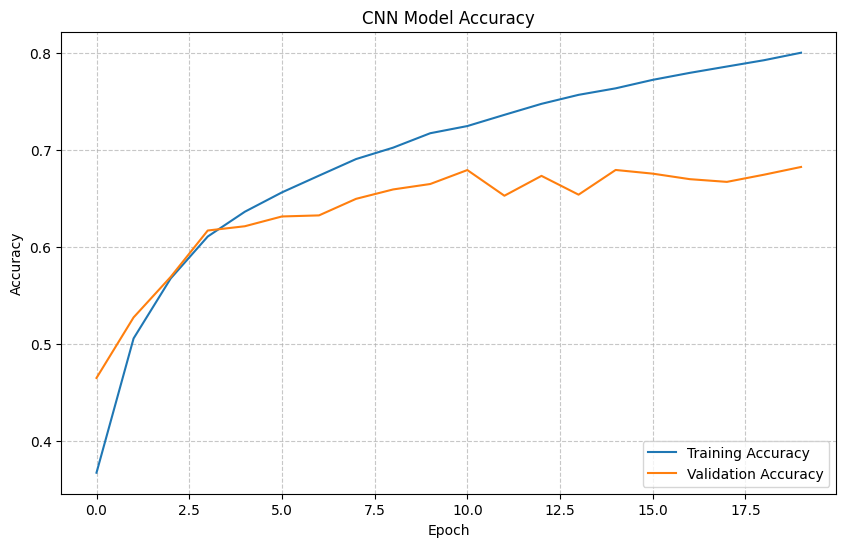

In [31]:
# Visualize the CNN model's learning curves
plt.figure(figsize=(10, 6))
plt.plot(cnn_train_acc, label='Training Accuracy')
plt.plot(cnn_val_acc, label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Compare all Three Models: Analysis

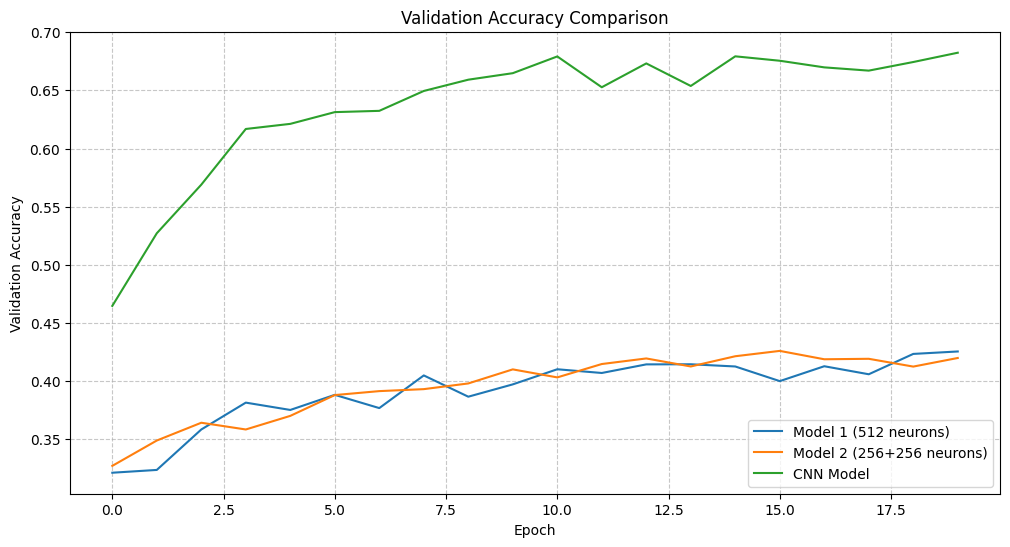

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(history1.history['val_accuracy'], label='Model 1 (512 neurons)')
plt.plot(history2.history['val_accuracy'], label='Model 2 (256+256 neurons)')
plt.plot(cnn_val_acc, label='CNN Model')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [33]:
# Print side-by-side comparison of all models
print("\nModel Comparison Summary:")
print("                                  | Validation Accuracy | Validation Error | Training Accuracy | Accuracy Gap")
print("----------------------------------|--------------------|-----------------|-------------------|-------------")
print(f"Model 1 (512 neurons)            | {val_acc1:.4f}            | {val_error1:.4f}          | {train_acc1:.4f}             | {acc_gap1:.4f}")
print(f"Model 2 (256+256 neurons)        | {val_acc2:.4f}            | {val_error2:.4f}          | {train_acc2:.4f}             | {acc_gap2:.4f}")
print(f"CNN Model                        | {cnn_final_val_acc:.4f}            | {cnn_val_error:.4f}          | {cnn_final_train_acc:.4f}             | {cnn_acc_gap:.4f}")


Model Comparison Summary:
                                  | Validation Accuracy | Validation Error | Training Accuracy | Accuracy Gap
----------------------------------|--------------------|-----------------|-------------------|-------------
Model 1 (512 neurons)            | 0.4254            | 0.5746          | 0.4625             | 0.0371
Model 2 (256+256 neurons)        | 0.4198            | 0.5802          | 0.4625             | 0.0427
CNN Model                        | 0.6824            | 0.3176          | 0.8003             | 0.1179


**Performance Differences**

- Dense Model 1: Validation Accuracy = 42.54% (Validation Error = 57.46%)
- Dense Model 2: Validation Accuracy = 41.98% (Validation Error = 58.02%)
- CNN Model: Validation Accuracy = 68.24% (Validation Error = 31.76%)

The CNN model achieves a validation accuracy that is 25.7 percentage points higher than the dense model 1. This represents a dramatic improvement in classification performance - the CNN's error rate is almost half that of the two dense models.

**Why CNN Performed Better for Image Classification**

Preservation of Spatial Information:

- Dense networks (like our Models 1 and 2) flatten the 32×32×3 images into a 1D array of 3,072 values
- This flattening process loses all spatial information about which pixels are next to each other
- CNNs maintain spatial relationships through convolutional filters that scan across the image


Parameter Efficiency:

- Our Model 1 has over 1.5 million parameters
- CNNs use significantly fewer parameters through weight sharing (the same filters are applied across the entire image)
- Thus, the CNN model likely has fewer parameters but better performance

Rather than learning relationships from scratch, the CNNs naturally build a hierarchy of features:

- Initial layers detect simple features like edges and textures
- Middle layers detect patterns and combinations of simple features
- Later layers detect complex objects and shapes

**So What?**

The significant performance gap shows why CNNs are now the standard for image classification. A basic CNN can easily outperform much larger dense networks, proving that the right architecture matters more than simply having more parameters when dealing with image data.

## Extra Credit: Improved CNN Model Implementation

### Run Improved CNN Model

In [36]:
# Import Dropout if not already imported
from tensorflow.keras.layers import Dropout, BatchNormalization

# Create an improved CNN model

In [45]:
# Make sure we're starting with a fresh model
improved_cnn = Sequential()

In [46]:
# First convolutional layer
improved_cnn.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
improved_cnn.add(Conv2D(32, (3, 3), activation='relu'))
improved_cnn.add(MaxPooling2D(pool_size=(2, 2)))
improved_cnn.add(Dropout(0.25))

In [47]:
# Second convolutional layer
improved_cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
improved_cnn.add(Conv2D(64, (3, 3), activation='relu'))
improved_cnn.add(MaxPooling2D(pool_size=(2, 2)))
improved_cnn.add(Dropout(0.25))

In [48]:
# Fully connected layers
improved_cnn.add(Flatten())
improved_cnn.add(Dense(512, activation='relu'))
improved_cnn.add(Dropout(0.5))
improved_cnn.add(Dense(10, activation='softmax'))

In [49]:
# Display model summary
improved_cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Compile with same settings as original CNN
improved_cnn.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [51]:
# Train the model
history_improved = improved_cnn.fit(X_train, y_train,
                                   epochs=20,
                                   batch_size=32,
                                   validation_data=(X_test, y_test))


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.3122 - loss: 1.8635 - val_accuracy: 0.5297 - val_loss: 1.3226
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5442 - loss: 1.2870 - val_accuracy: 0.6196 - val_loss: 1.0675
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6192 - loss: 1.0829 - val_accuracy: 0.6837 - val_loss: 0.9134
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6605 - loss: 0.9662 - val_accuracy: 0.6925 - val_loss: 0.8743
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6932 - loss: 0.8819 - val_accuracy: 0.7079 - val_loss: 0.8369
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7116 - loss: 0.8270 - val_accuracy: 0.7315 - val_loss: 0.7872
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7236 - loss: 0.7834 - val_accuracy: 0.7353 - val_loss: 0.7709
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7399 - loss: 0.7396

In [52]:
# Calculate validation accuracy and error
val_acc_improved = history_improved.history['val_accuracy'][-1]
val_error_improved = 1 - val_acc_improved

In [53]:
# Print comparison of all models
print("\nFinal Model Comparison:")
print(f"Model 1 (Dense, 512): Validation Accuracy = {val_acc1:.4f}, Error = {val_error1:.4f}")
print(f"Model 2 (Dense, 256+256): Validation Accuracy = {val_acc2:.4f}, Error = {val_error2:.4f}")
print(f"Base CNN: Validation Accuracy = {model_cnn.history.history['val_accuracy'][-1]:.4f}, Error = {1 - model_cnn.history.history['val_accuracy'][-1]:.4f}")
print(f"Improved CNN: Validation Accuracy = {val_acc_improved:.4f}, Error = {val_error_improved:.4f}")


Final Model Comparison:
Model 1 (Dense, 512): Validation Accuracy = 0.4254, Error = 0.5746
Model 2 (Dense, 256+256): Validation Accuracy = 0.4198, Error = 0.5802
Base CNN: Validation Accuracy = 0.6824, Error = 0.3176
Improved CNN: Validation Accuracy = 0.7722, Error = 0.2278


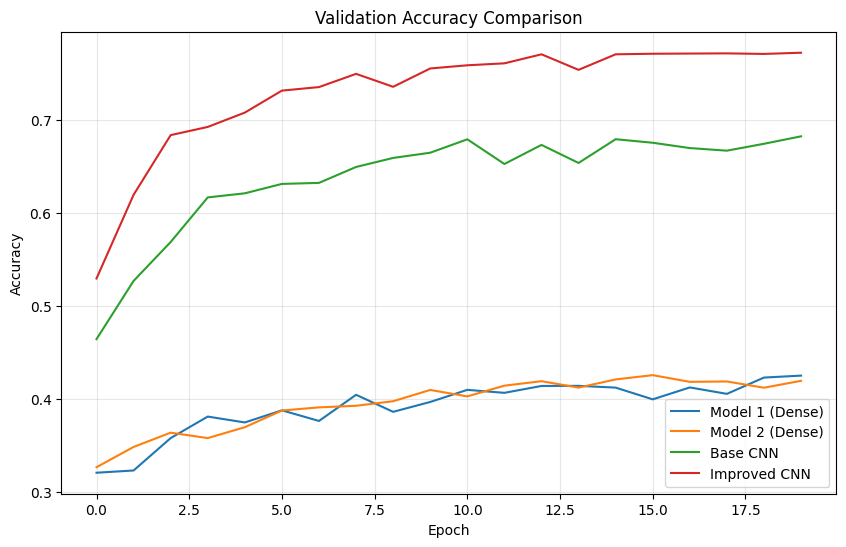

In [54]:
# Create a simple plot to compare validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history1.history['val_accuracy'], label='Model 1 (Dense)')
plt.plot(history2.history['val_accuracy'], label='Model 2 (Dense)')
plt.plot(model_cnn.history.history['val_accuracy'], label='Base CNN')
plt.plot(history_improved.history['val_accuracy'], label='Improved CNN')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Results and Discussion

Based on the results, our improved CNN model achieved a validation accuracy of 77.22%, which is significantly better than the base CNN model's 68.24% accuracy. This represents a 8.98 percentage point improvement and a reduction in error rate from 31.76% to 22.78%.
The key modifications that contributed to this improvement include:

- Adding an additional convolutional layer in each block, which allowed the model to learn more complex and hierarchical feature representations. By stacking two convolutional layers before each pooling layer, the network can detect more sophisticated patterns in the images.

- Implementing dropout regularization at various stages (25% after convolutional blocks and 50% after the dense layer). This forced the network to learn more robust features that don't depend on specific neuron combinations.

- Increasing the number of parameters in the fully connected layer from 64 to 512 neurons. This larger dense layer allowed the model to use the complex patterns identified by the convolutional layers better.

Looking at the validation accuracy graph, we can see that the improved CNN (red line) consistently outperformed all other models throughout the training process. It not only reached a higher final accuracy but also learned more quickly in the early epochs. The substantial performance gap between the dense models (~42% accuracy) and both CNN models (68-77% accuracy) confirms the importance of CCNs for image classification tasks.